### Does time of day affect arrest rate?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [2]:
style.use('seaborn-white')
sns.set(rc={'figure.figsize':(9,6)})

In [3]:
import pandas as pd

ri = pd.read_csv('police.csv')

### Accessing the datetime attributes(1)

In [4]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['date_and_time'] = pd.to_datetime(combined)
ri.date_and_time.dt.month[:5]

0    1
1    1
2    2
3    2
4    2
Name: date_and_time, dtype: int64

In [5]:
ri.set_index('date_and_time', inplace=True)

In [6]:
ri.index.month[:5]

Int64Index([1, 1, 2, 2, 2], dtype='int64', name='date_and_time')

- `dt` accessor is not used with a DateTimeIndex

In [7]:
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [8]:
ri.is_arrested.mean()

0.09025408486936048

In [9]:
monthly_arrests = ri.groupby(ri.index.month).is_arrested.mean()

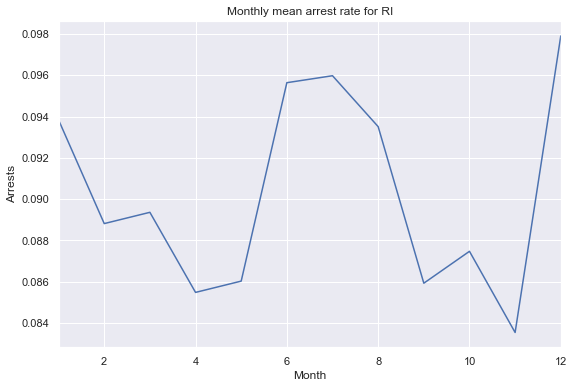

In [10]:
monthly_arrests.plot()
plt.xlabel('Month')
plt.ylabel('Arrests')
plt.title('Monthly mean arrest rate for RI')
plt.show()

In [11]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.09025408486936048
date_and_time
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


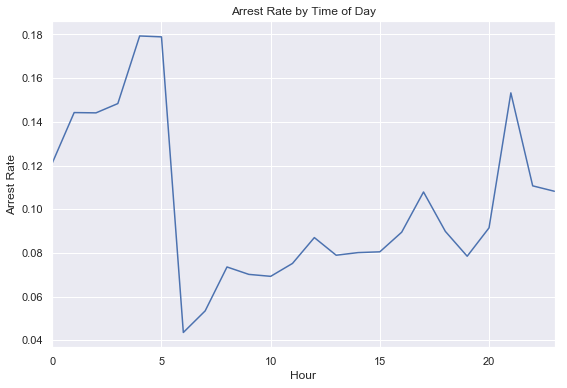

In [12]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

### Are drug related stops on the rise?

### Resampling arrests

In [13]:
ri.is_arrested.resample('Y').mean()

date_and_time
2005-12-31    0.081470
2006-12-31    0.091004
2007-12-31    0.088042
2008-12-31    0.094582
2009-12-31    0.117647
2010-12-31    0.103083
2011-12-31    0.105650
2012-12-31    0.085490
2013-12-31    0.089826
2014-12-31    0.067508
2015-12-31    0.068580
Freq: A-DEC, Name: is_arrested, dtype: float64

### Resampling searches

In [14]:
ri.search_conducted.resample('Y').mean()

date_and_time
2005-12-31    0.048323
2006-12-31    0.039773
2007-12-31    0.041567
2008-12-31    0.037585
2009-12-31    0.045780
2010-12-31    0.041808
2011-12-31    0.033129
2012-12-31    0.031808
2013-12-31    0.028164
2014-12-31    0.030544
2015-12-31    0.027384
Freq: A-DEC, Name: search_conducted, dtype: float64

### Concatenating arrests and searches

In [15]:
yearly_arrests = ri.is_arrested.resample('Y').mean()
yearly_searches = ri.search_conducted.resample('Y').mean()

yearly = pd.concat([yearly_arrests, yearly_searches], axis='columns')
yearly

,is_arrested,search_conducted
date_and_time,,
2005-12-31,0.081470,0.048323
2006-12-31,0.091004,0.039773
2007-12-31,0.088042,0.041567
2008-12-31,0.094582,0.037585
2009-12-31,0.117647,0.045780
2010-12-31,0.103083,0.041808
2011-12-31,0.105650,0.033129
2012-12-31,0.085490,0.031808
2013-12-31,0.089826,0.028164


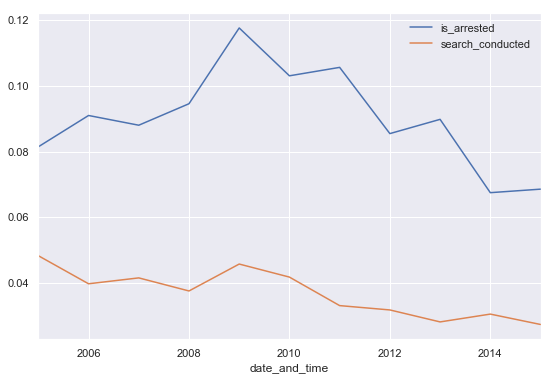

In [16]:
yearly.plot()
plt.show()

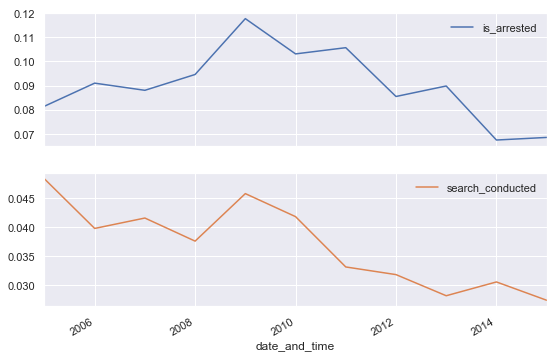

In [17]:
yearly.plot(subplots=True)
plt.show()

date_and_time
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


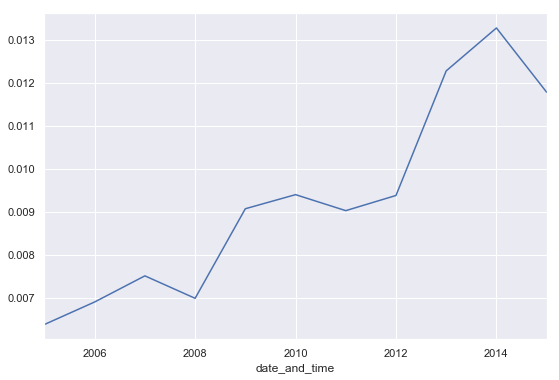

In [18]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

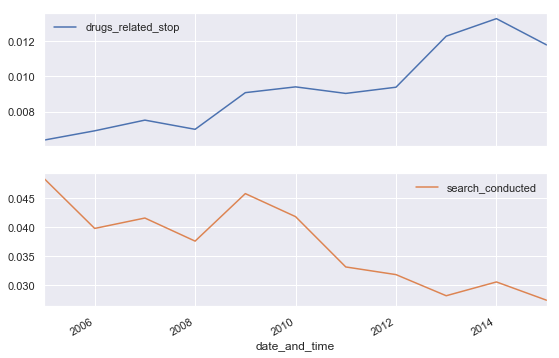

In [19]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

### What violations are caught in each district?

### Computing a frequency table

In [20]:
pd.crosstab(ri.driver_race, ri.driver_gender)

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [21]:
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 15)

In [22]:
table = pd.crosstab(ri.driver_race, ri.driver_gender)
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


### Selecting a DataFrame slice
- `loc` accessor: Select from a DataFrame by label

In [23]:
table.loc['Asian':'Hispanic']

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


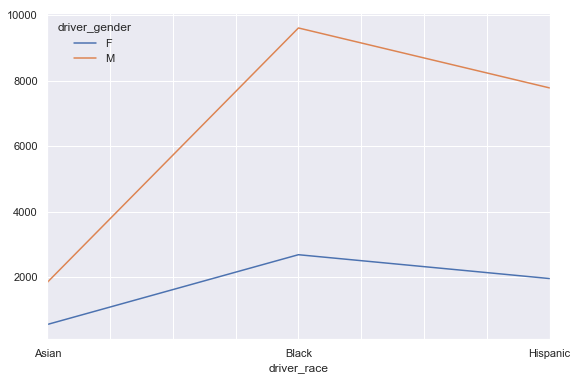

In [24]:
table = table.loc['Asian':'Hispanic']
table.plot()
plt.show()

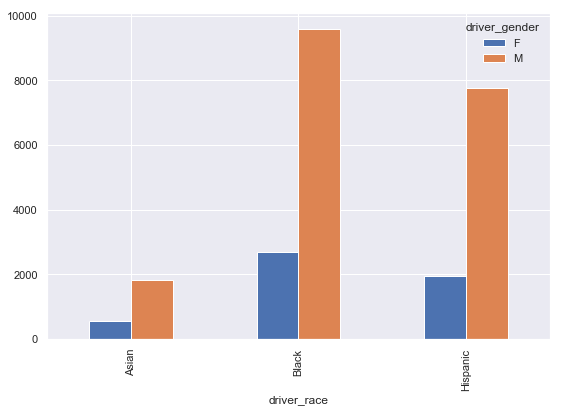

In [25]:
table.plot(kind='bar')
plt.show()

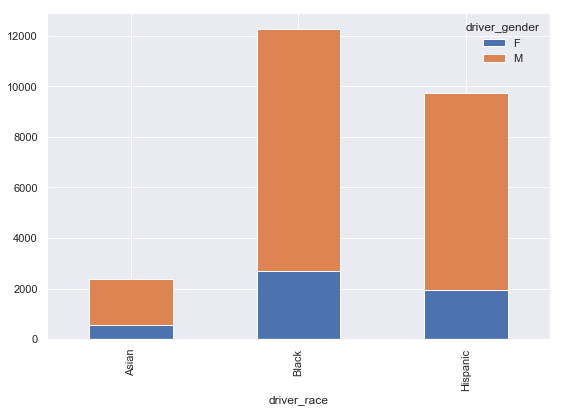

In [26]:
table.plot(kind='bar', stacked=True)
plt.show()

In [27]:
# Create a frequency table of districts and violations
display(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
display(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,673,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,706,695,638,12323
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,673,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,706,695,638,12323


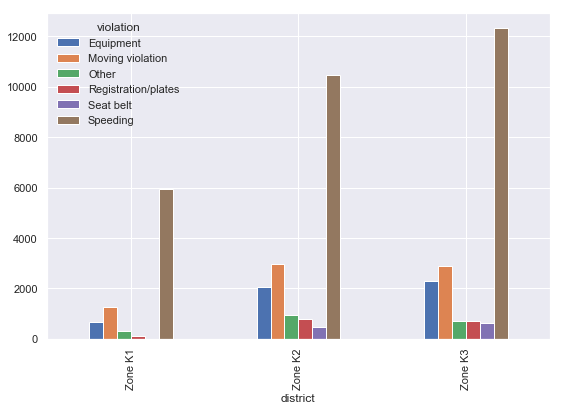

In [28]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

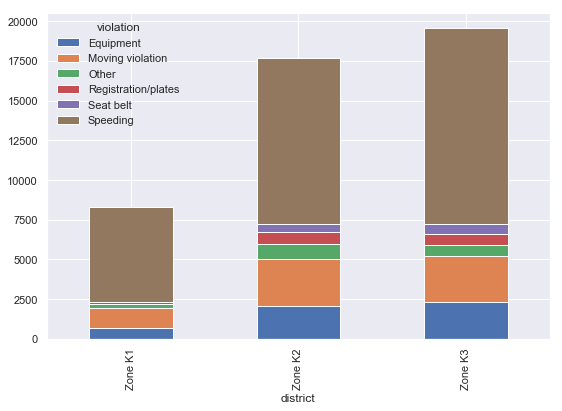

In [29]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

### Analyzing an object column

In [30]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

In [36]:
mapping = {'0-15 Min':False, '16-30 Min':True, 'nan':False, '30+ Min':True}
ri['longer_than_fifteen'] = ri.stop_duration.map(mapping).astype('bool')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,longer_than_fifteen
date_and_time,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
2005-02-17 04:15:00,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-02-20 17:15:00,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,True
2005-02-24 01:20:00,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False


In [37]:
ri.groupby('violation').longer_than_fifteen.mean()

violation
Equipment              0.167918
Moving violation       0.272744
Other                  0.421542
Registration/plates    0.290575
Seat belt              0.096989
Speeding               0.154655
Name: longer_than_fifteen, dtype: float64

In [32]:
ri.groupby('violation').search_conducted.mean()

violation
Equipment              0.064274
Moving violation       0.057014
Other                  0.045351
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

In [33]:
search_rate = ri.groupby('violation').search_conducted.mean()

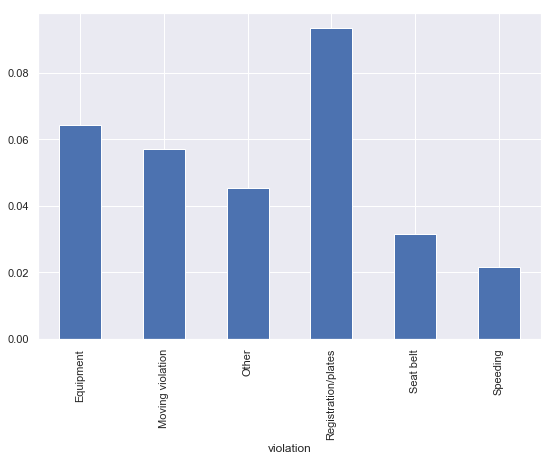

In [34]:
search_rate.plot(kind='bar')
plt.show()

In [38]:
search_rate.sort_values()

violation
Speeding               0.021560
Seat belt              0.031513
Other                  0.045351
Moving violation       0.057014
Equipment              0.064274
Registration/plates    0.093438
Name: search_conducted, dtype: float64

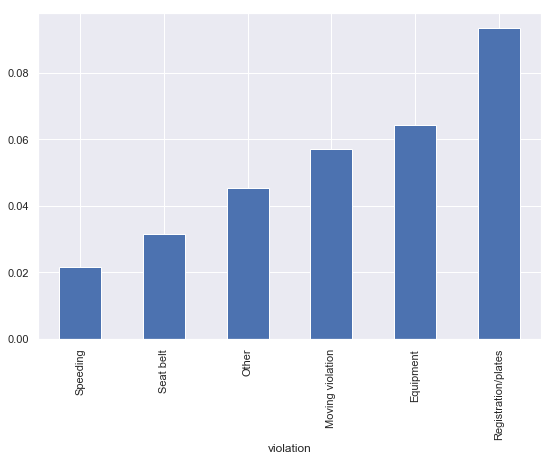

In [39]:
search_rate.sort_values().plot(kind='bar')
plt.show()

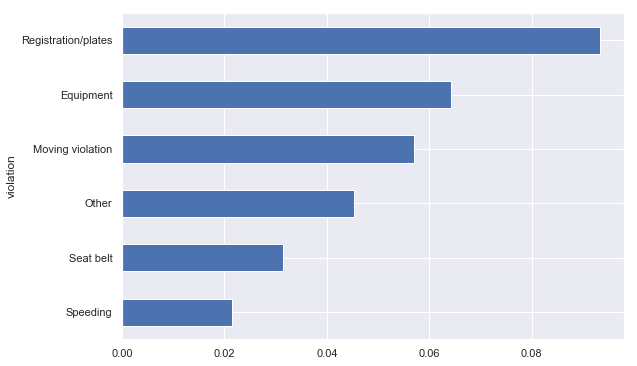

In [40]:
search_rate.sort_values().plot(kind='barh')
plt.show()

In [41]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


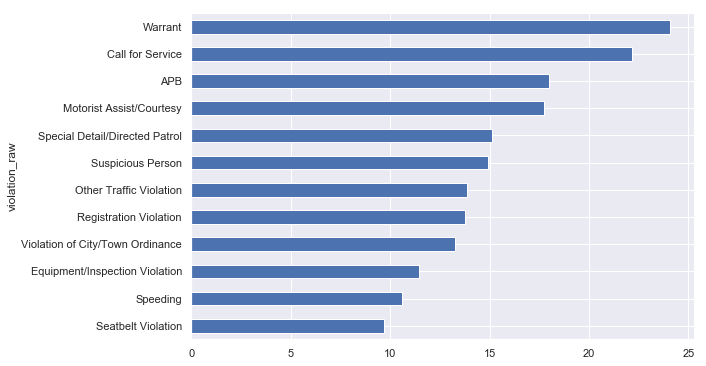

In [44]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()